# <span style="color: green;">Linear Regression</span>

variable | meaning | notes
---|---:|:---:
---|<span style="color: green;">y</span> = <span style="color: orange;">m</span> $\cdot$ <span style="color: red;">x</span> + <span style="color: blue;">b</span>| min 10 data points
<span style="color: green;font-weight: bold;">y</span> | dependent
<span style="color: red;font-weight: bold;">x</span> | independent
<span style="color: orange;font-weight: bold;">m</span> | slope | $\frac {rise} {run}$
<span style="color: blue;font-weight: bold;">b</span> | y-intercept | where line of best fit crosses y at x = 0

<center><img src="Linalg_line_of_best_fit_running.png" width="600px"></img></center>

In [1]:
import numpy as np
from random import randint
import sys
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1993)

In [2]:
def printer(val, suffix:str = ""):
    print('|----------------------------------------------------------')
    print(f"|               {val}")
    print('|')
    print(f"|               {suffix}")
    print('|----------------------------------------------------------')
    

class Point:
    '''
    args:
        values: list - list of tuples(independent, dependent)
    '''
    def __init__(self, 
                 values: list):
                    
        self.values = values

    def __repr__(self):

        return f"HPoint({self.values[0]},{self.values[1]})"

    def __getitem__(self, key):

        # This way will be clearer to get x and y from the point than indices
        
        match(key):
            case 'x':
                return self.values[0]
            case 'y':
                return self.values[1]
                
class LinearRegression:
    
    '''
    Implementation of simple linear regression model
    '''

    def __init__(self,
                 # Accept lists or numpy arrays as arguemnts
                 x: list | np.ndarray,
                 y: list | np.ndarray,
                 /,
                 independent: int, # Default dtype is 8 bit signed integer (-128, 127)
                 
                 dtype: str = "int8"):
        
        try:
            
            self.x = np.array(x, dtype = dtype)
            self.y = np.array(y, dtype = dtype)
            self.independent = independent
            self._xy_list = list(zip(self.x, self.y))
            self._points = [Point(p) for p in self._xy_list]
            self.stats = self.calculate(independent, stats = True)
            self.dependent = self.calculate(independent)
            
        except TypeError as e:
            printer(e.args[0])
            return
        except OverflowError as e:
            printer(e.args[0], suffix = "Suggestion: Adjust dtype argument to allow for enought space for the value")
            return
        finally:
            print("Checks done")
        
    def __repr__(self):
        try:
            return f"<list: Point(x, y)>\n{self._points}"
        except AttributeError as err:
            return f"Program failed:\n {err.args[0]}"

    def calculate(self, independent: int | list, stats: bool = False):

        # ----------------- Pseudo for now, these randoms should \
        #                   rather be swapped for some sort of residuals\
        #                   calculation to get the values for the       \
        #                   line of best fit.
        #------------------

        # Use pseudo random generator to generate 2 random indices for 
        random_point_first = randint(0, len(self.x)-2)
        random_point_second = randint(random_point_first+1, len(self.y) - 1)
        point1 = self._points[random_point_first]
        point2 = self._points[random_point_second]
        # --------------------------------------------------------------
        
        # Define line of best fit between two points
        line_of_best_fit = [point1, point2]
        # Define what rise and run are
        rise = line_of_best_fit[1]["y"] - line_of_best_fit[0]["y"]
        run = line_of_best_fit[1]["x"] - line_of_best_fit[0]["x"]

        slope: float = rise / run
        b = line_of_best_fit[0]["y"] - slope * line_of_best_fit[0]["x"]

        dependent = slope * independent + b
        
        return (slope, b, dependent) if stats else dependent

In [3]:
linreg = LinearRegression(list(np.linspace(6, 350, 10)), list(np.linspace(20, 448, 10)), independent = 320, dtype="int16")
slope, b, dependent = linreg.stats


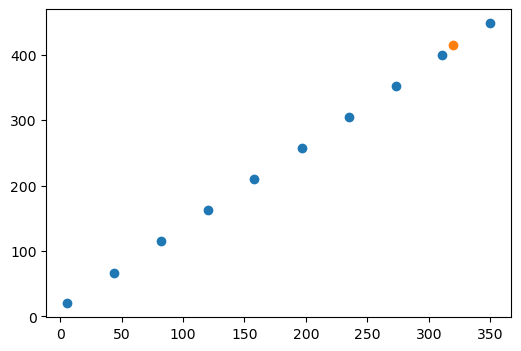

<Figure size 640x480 with 0 Axes>

In [4]:
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(linreg.x, linreg.y)
ax.scatter(linreg.independent, dependent)

plt.show()
plt.clf()